(1, 772, 564)
(772, 564)
<class 'numpy.ndarray'>


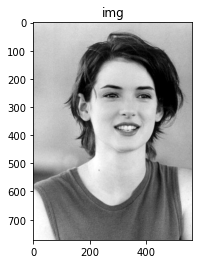

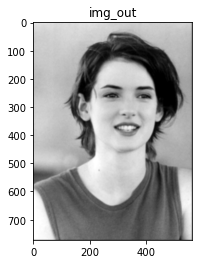

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Conv2D
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Steps 2~9 (25 points)
# Enter your code here.
inputs = tf.keras.Input((None, None, 1))
stride=(1,1)
kernel_size=5
outputs = Conv2D(1, kernel_size, stride, padding='same', name='conv1')(inputs)

filter_net = tf.keras.Model(inputs = inputs, outputs = outputs ) 

bias = np.array([0])
weights = np.full((kernel_size, kernel_size, 1, 1),1/kernel_size**2)
#print(weights)
filter_net.get_layer('conv1').set_weights([weights, bias])

img = cv2.imread('Winona.jpg', cv2.IMREAD_GRAYSCALE)
img_batch = np.expand_dims(img, axis=0)
print(img_batch.shape)

img_out = filter_net(img_batch)
img_out = np.squeeze(img_out).astype(np.uint8)
print(img_out.shape)
print(type(img_out))

plt.imshow(img, cmap='gray')
plt.title("img")
plt.show()

plt.imshow(img_out, cmap='gray')
plt.title("img_out")
plt.show()



In [14]:
#[Question 1 (5 points)] If kernel_size in Steps 3 and 5 is changed from 5 to 11,
# how will img_out change (more blurry or more clear)? Why?
# more blurry 因為越大的kernel_size就是以更大的範圍取平均，會使數值較接近，在灰階影像則會越模糊

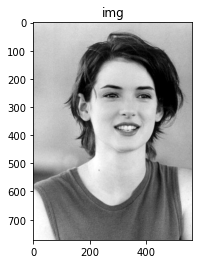

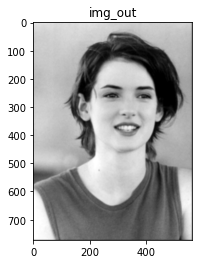

In [16]:
# Steps 10~13 (15 points)
# Enter your code here.
pad = int((kernel_size-1) / 2)
img_pad = np.zeros((772+2*pad, 564+2*pad))
img_pad[2:774,2:566]=img

inputs = tf.keras.Input((None, None, 1))
kernel_size = 5
stride = 1
outputs = Conv2D(1, kernel_size, stride, padding='valid', name='conv1')(inputs)
filter_net = tf.keras.Model(inputs = inputs, outputs = outputs)

bias = np.array([0])
weights = np.full((kernel_size, kernel_size, 1, 1),1/kernel_size**2)
filter_net.get_layer('conv1').set_weights([weights, bias])

img_batch = np.expand_dims(img_pad, axis=0)
img_out = filter_net(img_batch)
img_out = np.squeeze(img_out).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.title("img")
plt.show()

plt.imshow(img_out, cmap='gray')
plt.title("img_out")
plt.show()


In [ ]:
# [Question 2 (5 points)] Let Step 2 to Step 9 be denoted as Method 1, and Step 10 to Step 13 be denoted as Method 2. 
# Why Methods 1 and 2 lead to the same results?
# 方法1使用padding=same，輸出會自動補成輸入的大小，方法2則是自己設計pad，利用公式設計出與輸入一樣的大小，所以兩方法結果一樣。